In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Data

In [2]:
#df_charges = pd.read_csv('/kaggle/input/hardik-datasets/charges_data.csv')
df_charges = pd.read_csv('charges_data.csv')

In [3]:
df_charges.head()

,customerID,tenure,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   tenure            7032 non-null   int64  
 2   contract          7032 non-null   object 
 3   paperlessBilling  7032 non-null   object 
 4   paymentMethod     7032 non-null   object 
 5   monthlyCharges    6577 non-null   float64
 6   totalCharges      6577 non-null   float64
 7   churn             7032 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 439.6+ KB


# Cleaning Data

In [5]:
df_charges.isna().sum()

customerID            0
tenure                0
contract              0
paperlessBilling      0
paymentMethod         0
monthlyCharges      455
totalCharges        455
churn                 0
dtype: int64

In [6]:
df_charges_cleaned = df_charges.dropna()

In [7]:
df_charges_cleaned.isna().sum()

customerID          0
tenure              0
contract            0
paperlessBilling    0
paymentMethod       0
monthlyCharges      0
totalCharges        0
churn               0
dtype: int64

# Data Visualization

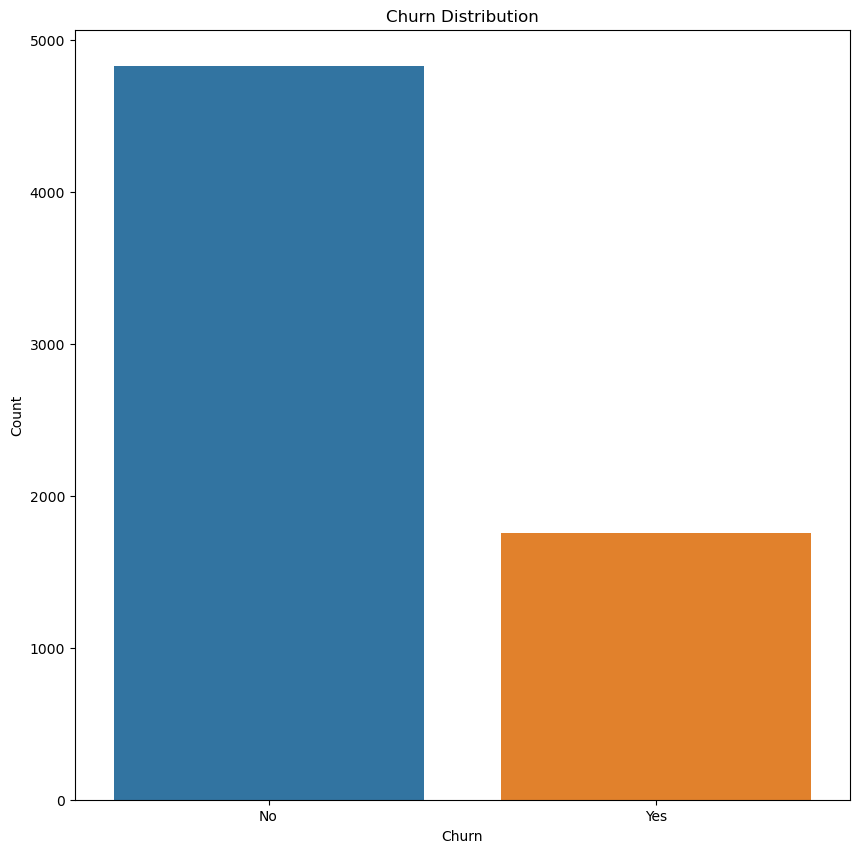

In [8]:
# Churn distribution
plt.figure(figsize=(10,10))
sns.countplot(x='churn', data=df_charges_cleaned)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

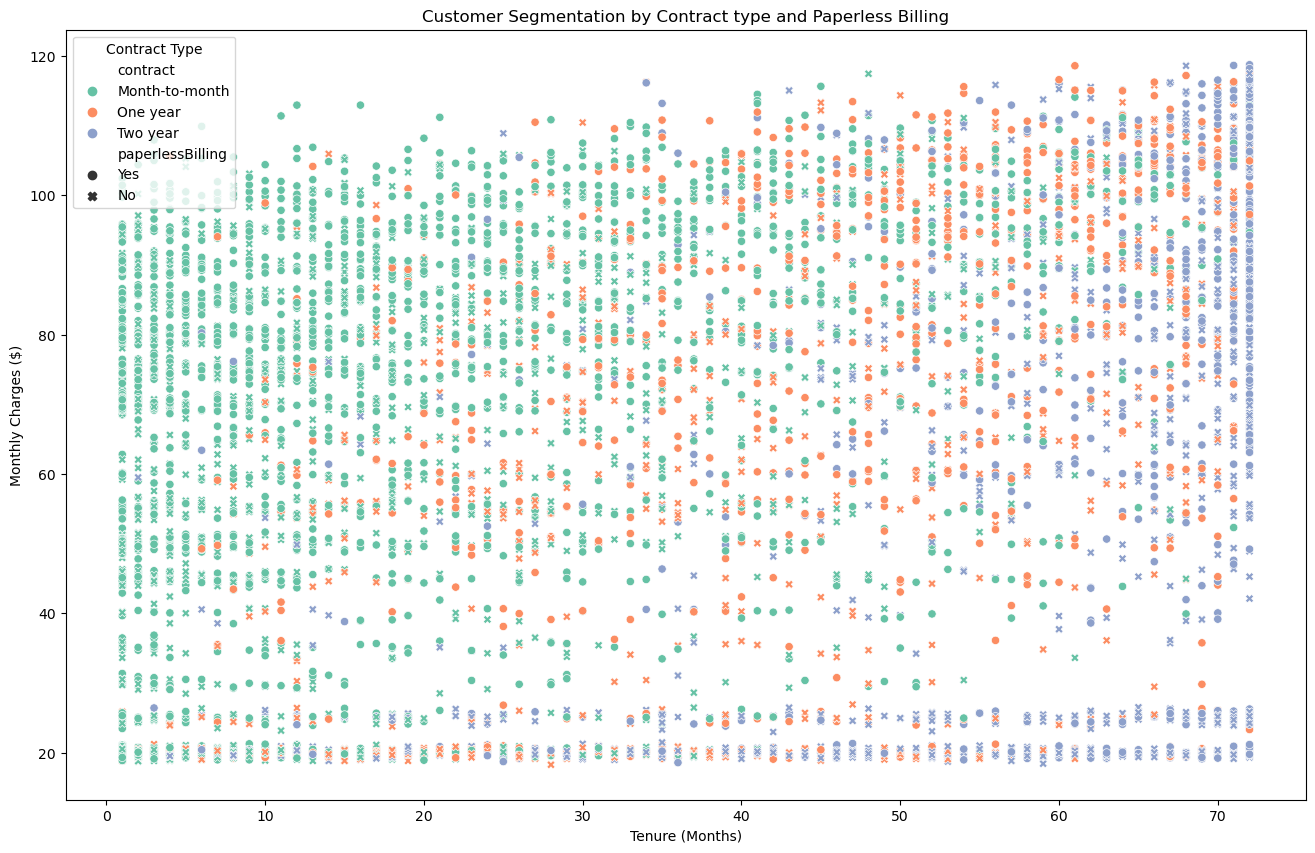

In [9]:
# Customer Segmentation
plt.figure(figsize=(16, 10))
sns.scatterplot(x='tenure', y='monthlyCharges', hue='contract', style = 'paperlessBilling', data=df_charges_cleaned, palette='Set2')
plt.title('Customer Segmentation by Contract type and Paperless Billing')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Contract Type', loc='upper left')
plt.show()


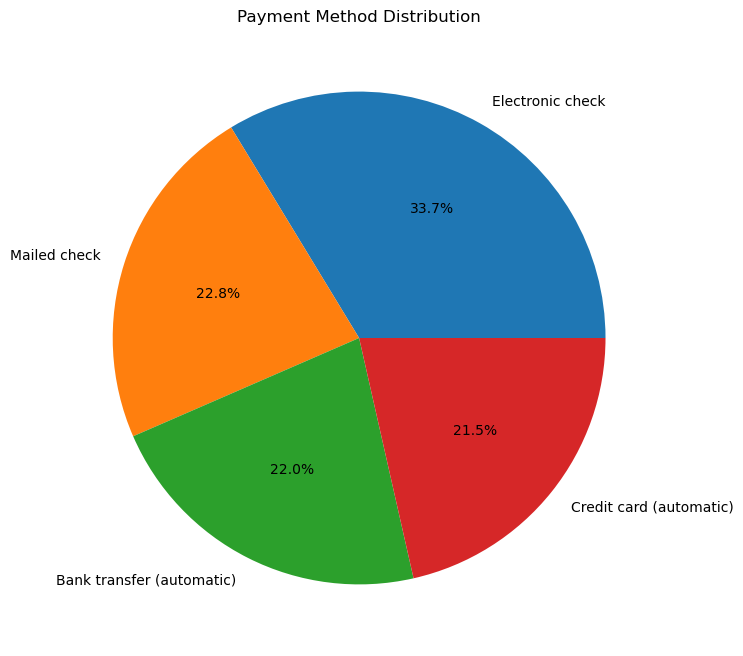

In [10]:
#Payment method
plt.figure(figsize=(10,8))
df_charges_cleaned['paymentMethod'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

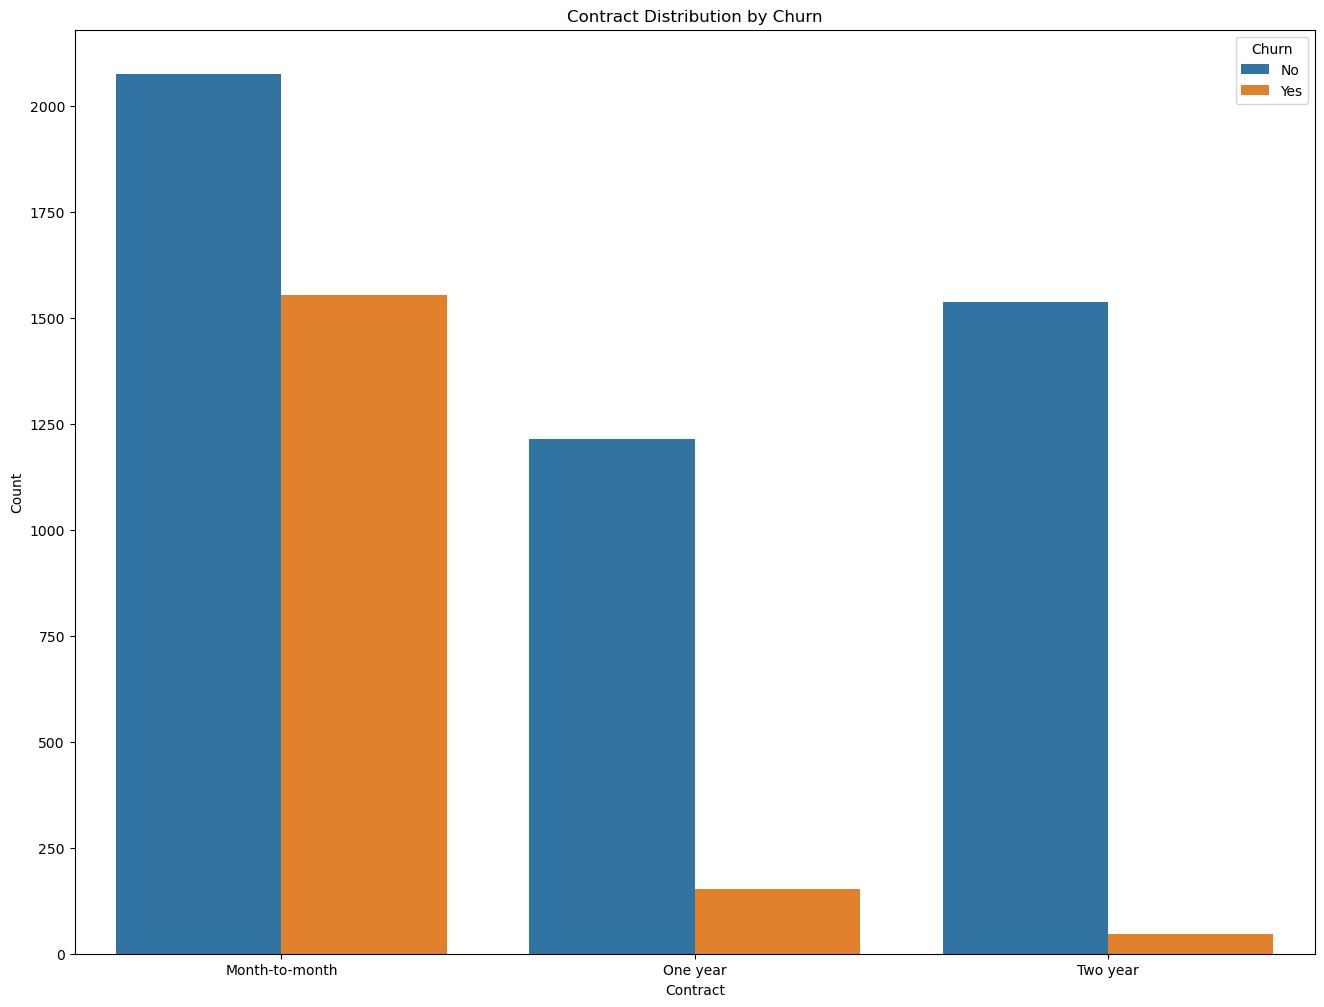

In [11]:
# Contracts
plt.figure(figsize=(16, 12))
sns.countplot(x='contract', hue='churn', data=df_charges_cleaned)
plt.title('Contract Distribution by Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

c:\Users\D4RT5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


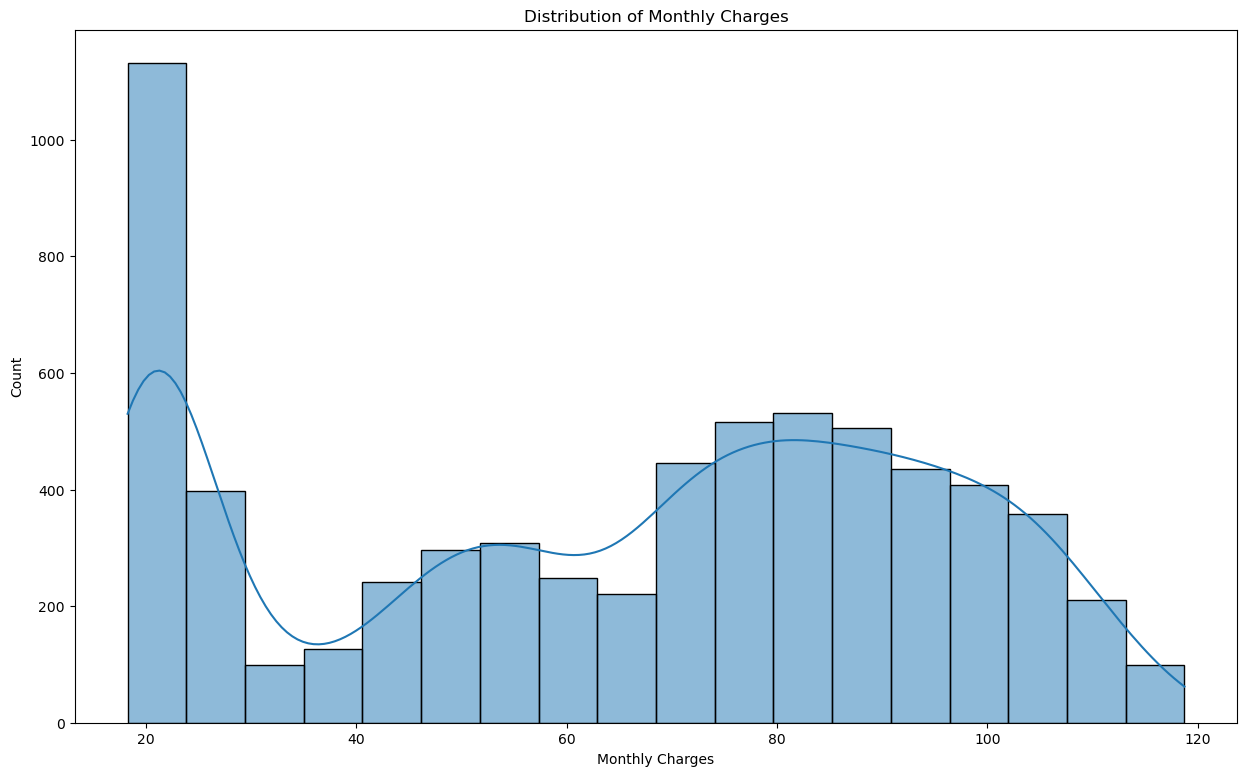

In [12]:
# Monthly Charges
plt.figure(figsize=(15, 9))
sns.histplot(x='monthlyCharges', data=df_charges_cleaned, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()


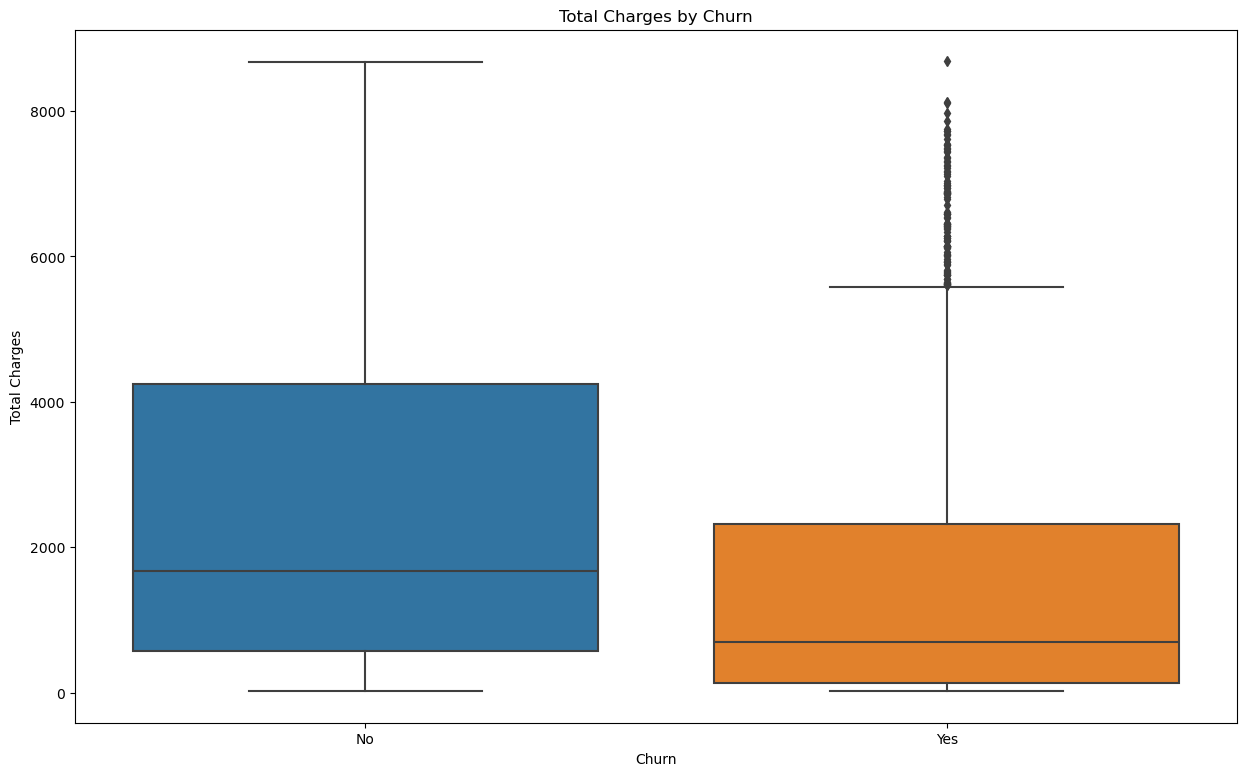

In [13]:
# Total Charges
plt.figure(figsize=(15, 9))
sns.boxplot(x='churn', y='totalCharges', data=df_charges_cleaned)
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

c:\Users\D4RT5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


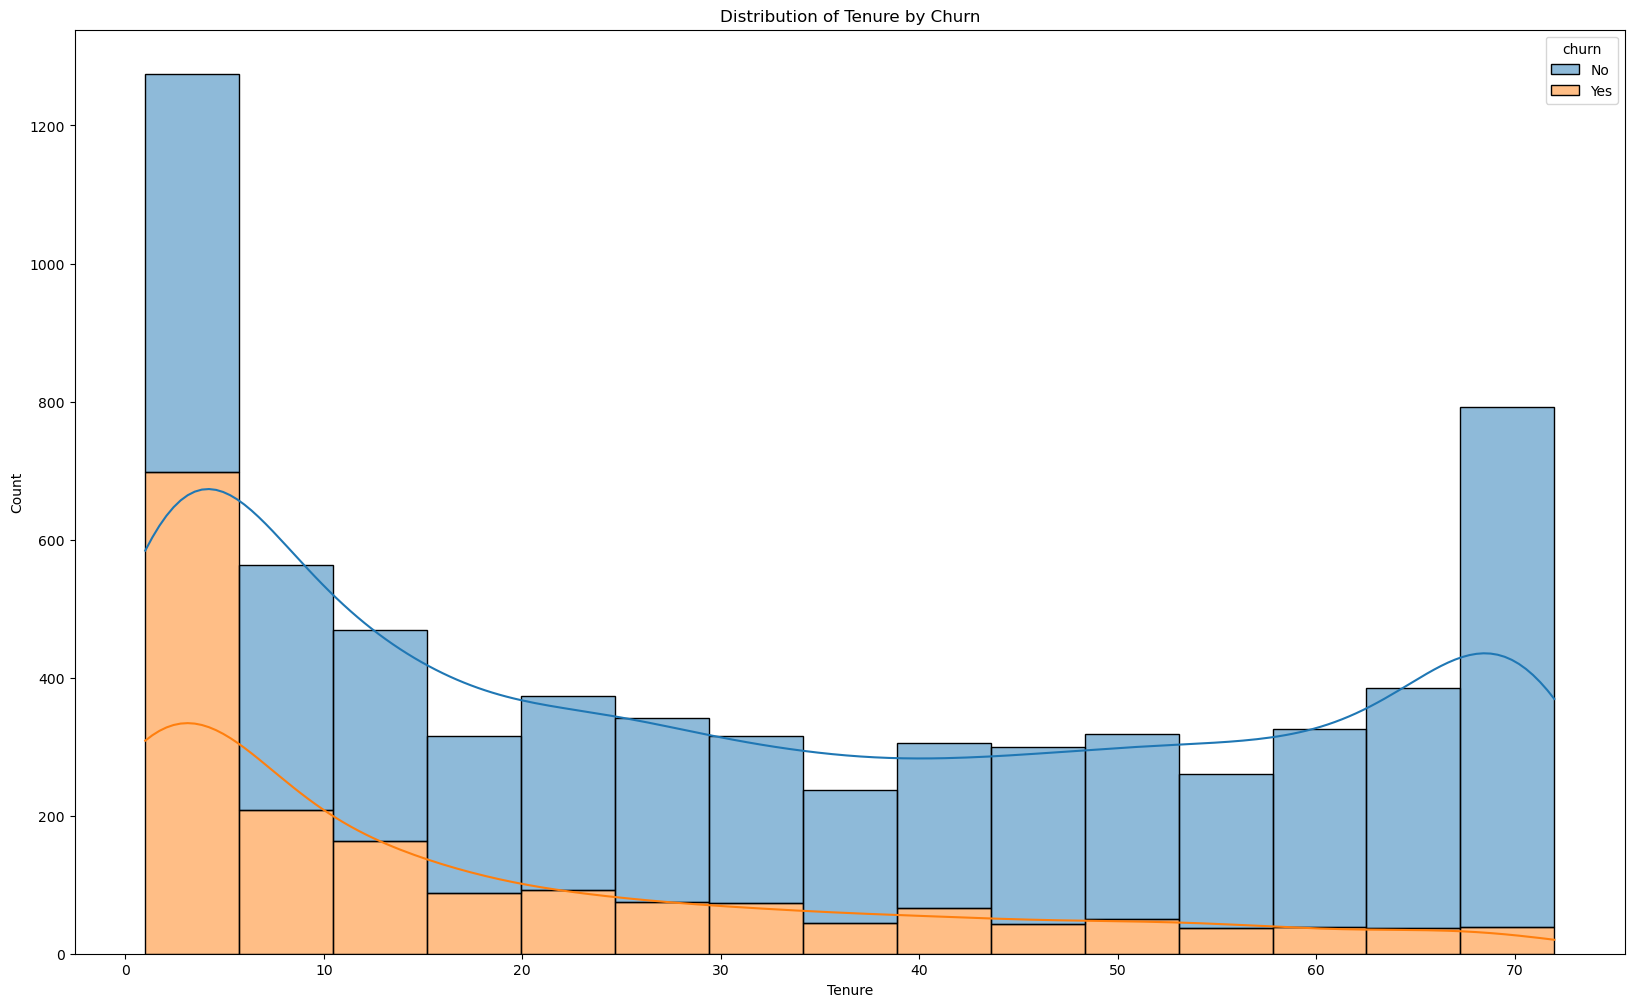

In [14]:
# Tenure Distribution by Churn
plt.figure(figsize=(20,12))
sns.histplot(x='tenure', hue='churn', data=df_charges_cleaned, kde=True, multiple='stack')
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

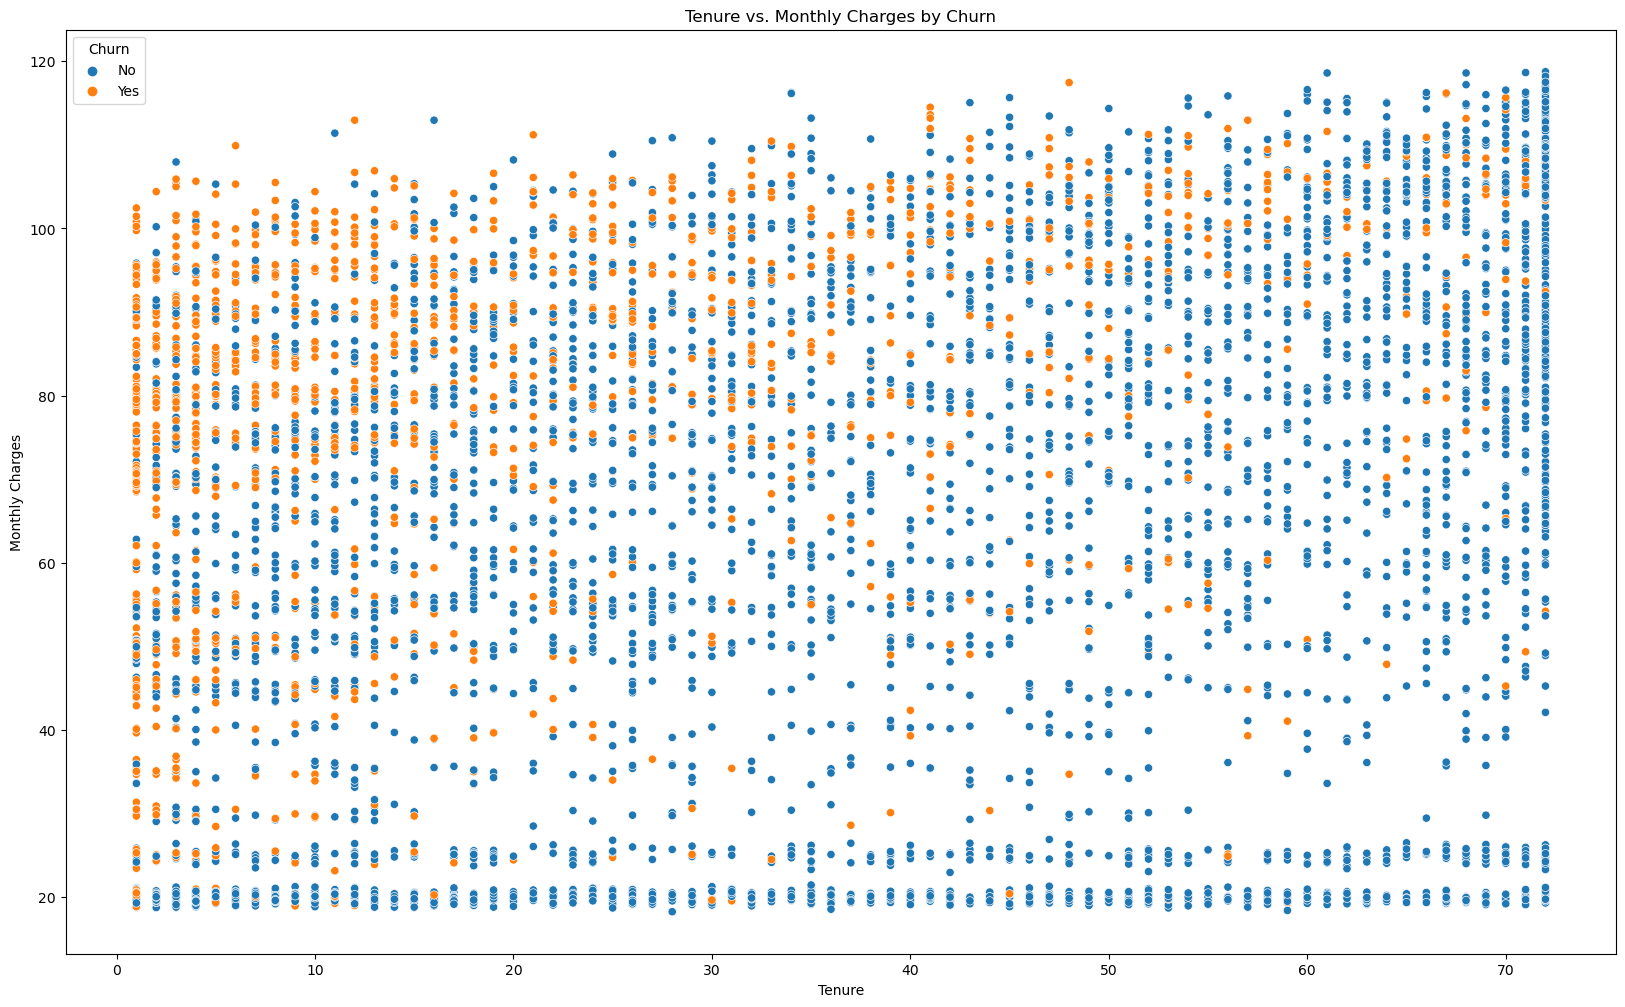

In [15]:
# Tenure vs Monthly Charges
plt.figure(figsize=(20, 12))
sns.scatterplot(x='tenure', y='monthlyCharges', hue='churn', data=df_charges_cleaned)
plt.title('Tenure vs. Monthly Charges by Churn')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn')
plt.show()


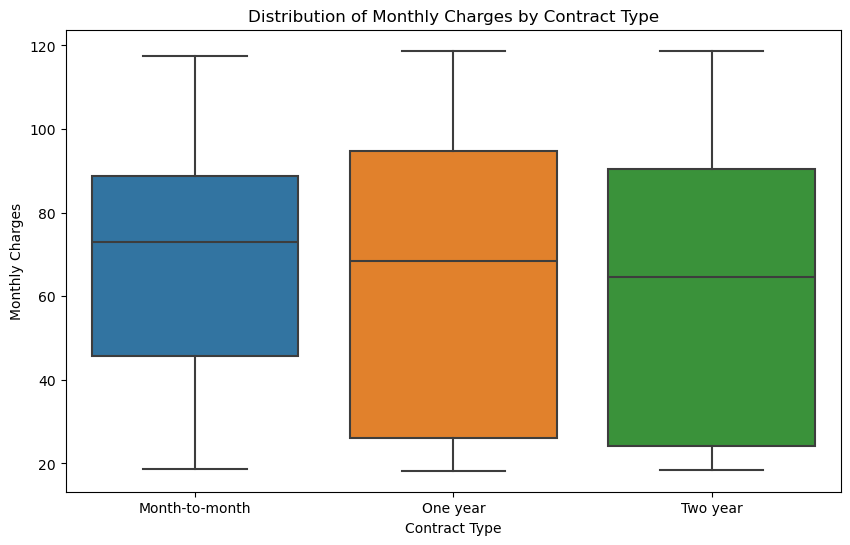

In [16]:
#Distribution of Monthly Charges by Contract type
plt.figure(figsize=(10, 6))
sns.boxplot(x='contract', y='monthlyCharges', data=df_charges_cleaned)
plt.title('Distribution of Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()
